In [2]:
# Importation bibliothèques et modules Python
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split


bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

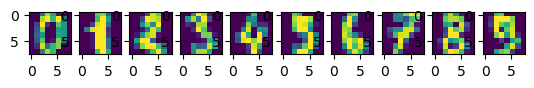

In [3]:
# Importation du dataset digits de scikit-learn
from sklearn.datasets import load_digits

# Sauvegarde du dataset digits de scikit-learn dans la variable digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [4]:
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [5]:
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# Chargement du modèle decision tree classifier
clf = tree.DecisionTreeClassifier()

# Application du modèle random forest à nos données
clf.fit(X_train, y_train)

# Prédiction du modèle sur les données de test
Z = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy=clf.score(X_test,y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))

Accuracy = 0.6458590852904821


In [6]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.8222222222222222
0.8777777777777778
0.9333333333333333
0.9
0.8111111111111111
0.8888888888888888
0.8777777777777778
0.8777777777777778
0.8333333333333334
0.8888888888888888
0.8
0.8555555555555555
0.8
0.7555555555555555
0.8
0.8333333333333334
0.8444444444444444
0.8777777777777778
0.8777777777777778
0.8222222222222222
0.8111111111111111
0.8777777777777778
0.8222222222222222
0.8666666666666667
0.8888888888888888
0.9222222222222223
0.8222222222222222
0.9
0.9
0.8555555555555555
0.9111111111111111
0.8555555555555555
0.8222222222222222
0.9111111111111111
0.7777777777777778
0.8222222222222222
0.9
0.9222222222222223
0.8444444444444444
0.8666666666666667
0.7666666666666667
0.8555555555555555
0.8444444444444444
0.8666666666666667
0.8444444444444444
0.8777777777777778
0.9111111111111111
0.8555555555555555
0.8666666666666667
0.8
0.8111111111111111
0.8555555555555555
0.8888888888888888
0.9
0.8333333333333334
0.9333333333333333
0.8222222222222222
0.8777777777777778
0.8222222222222222
0.855555555555

In [7]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

In [8]:
# Application du modèle random forest à nos données
clf.fit(X_train, y_train)

# Prédiction du modèle sur les données de test
Z = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy=clf.score(X_test,y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))

Accuracy = 0.9222222222222223


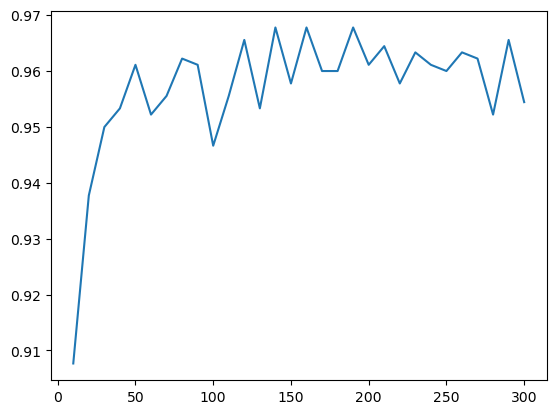

In [9]:
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    # Application du modèle bagging classifier
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    
    # Application du modèle aux données d'entrainement
    clf.fit(X_train, y_train)
    
    # Prédiction sur les données de test
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [10]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9199110122358176
max_samples: 0.8
max_features: 0.8


In [11]:
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Chargement du modèle random forest classifier
clf = RandomForestClassifier(n_estimators=200)

# Application du modèle
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [13]:
# prédiction des résultats du modèle random forest classifier
y_pred = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy = clf.score(X_test, y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))


Accuracy = 0.9196538936959209


In [14]:
# Chargement et application du modèle decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

# Chargement et application du modèle bagging classifier
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

# Chargement et application du modèle random forest classifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.6829419035846724
Bagging (200 arbres) : 0.9029666254635352
Forêt aléatoire (200 arbres) : 0.92336217552534


In [20]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print("Bagging mean accuracy = {}".format(np.mean(bagging_accuracies)), "Bagging standard accuracy deviation = {}".format(np.std(bagging_accuracies)))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print("Random Forest mean accuracy = {}".format(np.mean(rf_accuracies)), "Random Forest standard accuracy deviation = {}".format(np.std(rf_accuracies)))

Bagging mean accuracy = 0.9280311457174639 Bagging standard accuracy deviation = 0.0053589274618224235
Random Forest mean accuracy = 0.9607341490545049 Random Forest standard accuracy deviation = 0.006352076322700441


10 0.9521690767519466
20 0.9599555061179088
30 0.9699666295884316
40 0.9733036707452726
50 0.9655172413793104
60 0.9632925472747497
70 0.9777530589543938
80 0.9766407119021134
90 0.9744160177975528
100 0.9777530589543938
110 0.9733036707452726
120 0.9755283648498332
130 0.9744160177975528
140 0.9744160177975528
150 0.9733036707452726
160 0.9721913236929922
170 0.9744160177975528
180 0.9777530589543938
190 0.982202447163515
200 0.9755283648498332
210 0.9810901001112347
220 0.9766407119021134
230 0.9744160177975528
240 0.978865406006674
250 0.9755283648498332
260 0.9744160177975528
270 0.9777530589543938
280 0.9799777530589544
290 0.9766407119021134
300 0.9777530589543938


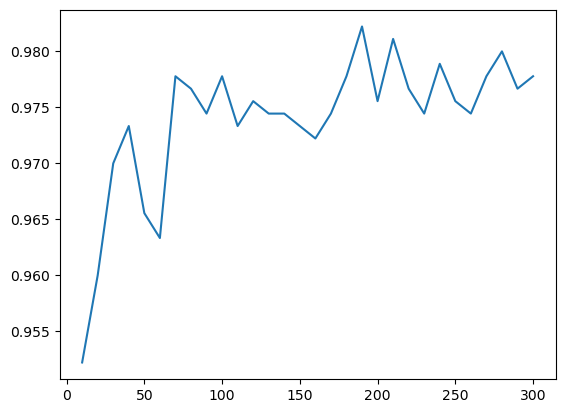

In [16]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : {}".format(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : {}".format(accuracy))

Forêt aléatoire : 0.96440489432703
Extra Trees : 0.9833147942157954


In [18]:
from sklearn.ensemble import AdaBoostClassifier

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)

# Application du modèle AdaBoostClassifier
clf.fit(X_train, y_train)

# Calcul de l'accuracy du modèle sur les données de test
accuracy = clf.score(X_test, y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))

Accuracy = 0.9122373300370828
